In [100]:
import numpy as np
import pandas as pd


In [101]:

# Replace 'utf-8' with the appropriate encoding for your file if it's different
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
    

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4132,spam,FreeMsg Today's the day if you are ready! I'm ...,NaN,NaN,NaN
2542,ham,Aiyo please Ì_ got time meh.,NaN,NaN,NaN
3839,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...,NaN,NaN,NaN
1350,ham,Bugis oso near wat...,NaN,NaN,NaN
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...,NaN,NaN,NaN


In [104]:
df.shape

(5572, 5)

In [105]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website

# 1. Data Cleaning

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [107]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [108]:
df.sample(5)


,v1,v2
3237,ham,Good. No swimsuit allowed :)
1183,ham,Am i that much bad to avoid like this?
1897,ham,"Aight, sounds good. When do you want me to com..."
942,spam,How about getting in touch with folks waiting ...
3125,ham,U coming 2 pick me?


In [109]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3062,spam,"Hi babe its Jordan, how r u? Im home from abro..."
4151,ham,What's nannys address?
249,spam,Congratulations ur awarded 500 of CD vouchers ...
226,spam,Will u meet ur dream partner soon? Is ur caree...
515,ham,S:)no competition for him.


In [110]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [111]:
df['target'] = encoder.fit_transform(df['target'])


In [112]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [114]:
# check for duplicate values
df.duplicated().sum()

403

In [115]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [116]:
df.duplicated().sum()


0

In [117]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis(EDA)

In [118]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

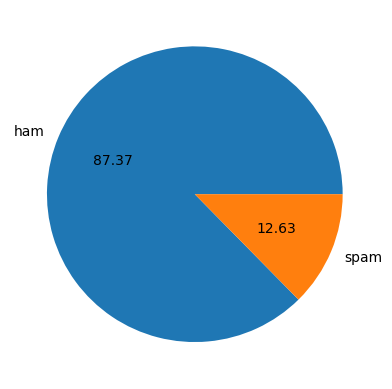

In [120]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [121]:
# Data is imbalanced


In [122]:
import nltk

In [123]:
!pip install nltk


In [124]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
df['num_characters'] = df['text'].apply(len)


In [126]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [127]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [128]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [129]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [130]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [131]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [132]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [133]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

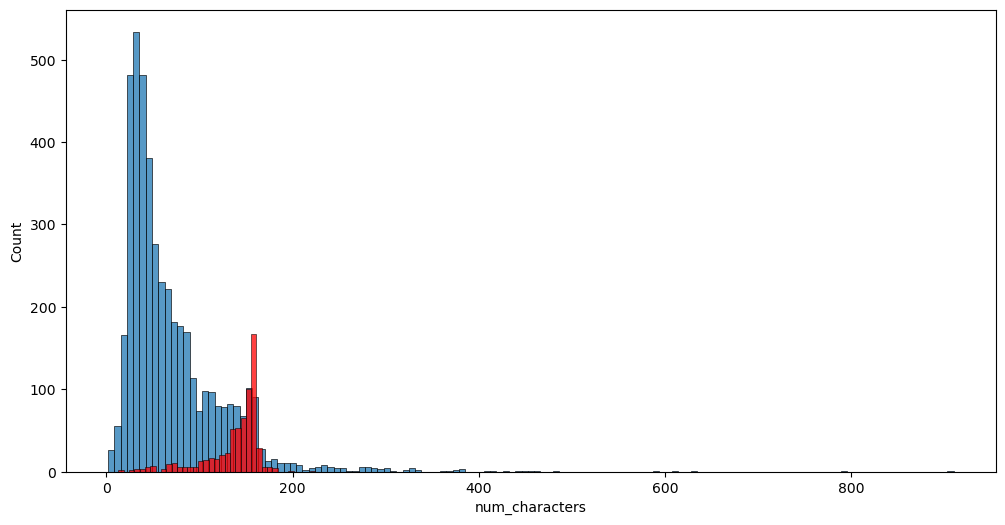

In [134]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

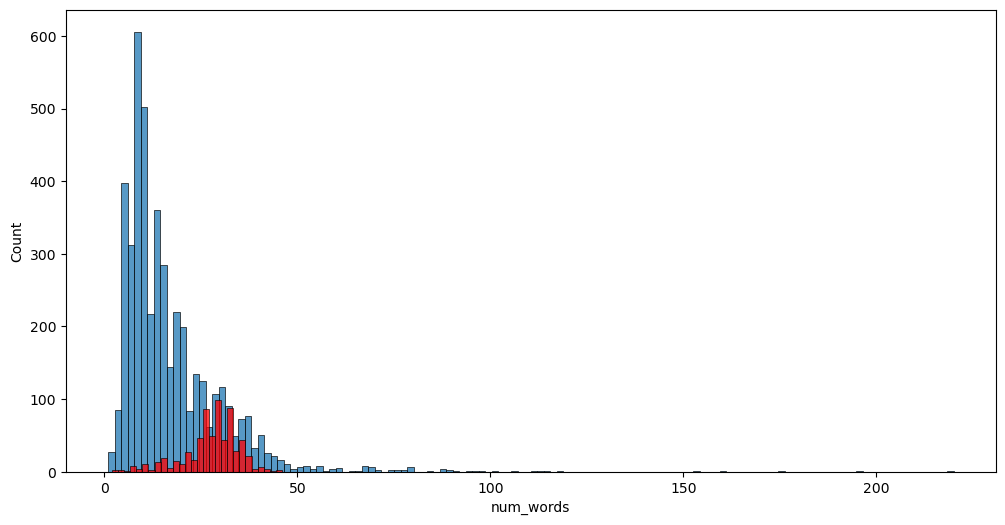

In [135]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

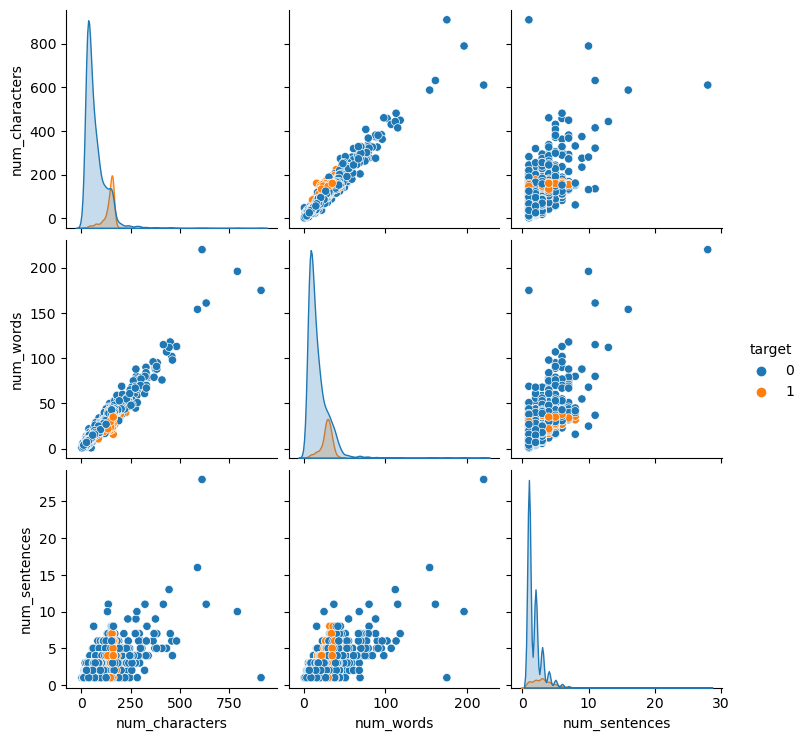

In [136]:
sns.pairplot(df,hue='target')

C:\Users\91939\AppData\Local\Temp\ipykernel_14356\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

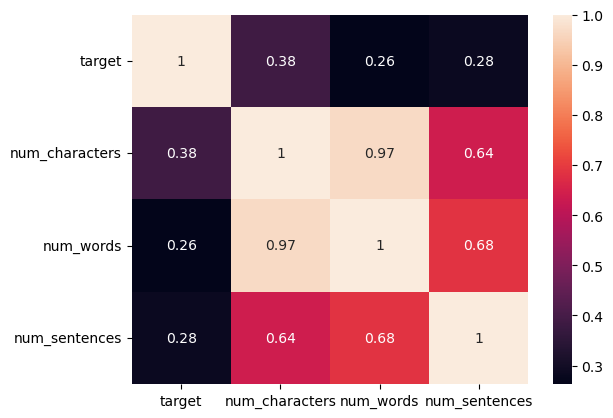

In [137]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
# .Lower case
# .Tokenization
# .Removing special characters
# .Removing stop words and punctuation
# .Stemming

In [138]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [139]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [140]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [141]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [142]:
df['transformed_text'] = df['text'].apply(transform_text)

In [143]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [144]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [145]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


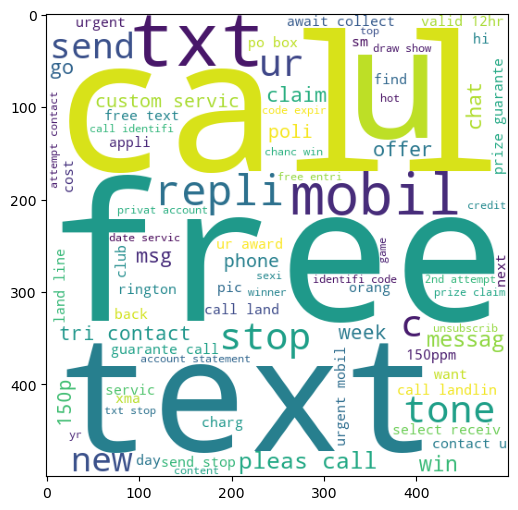

In [146]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [147]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

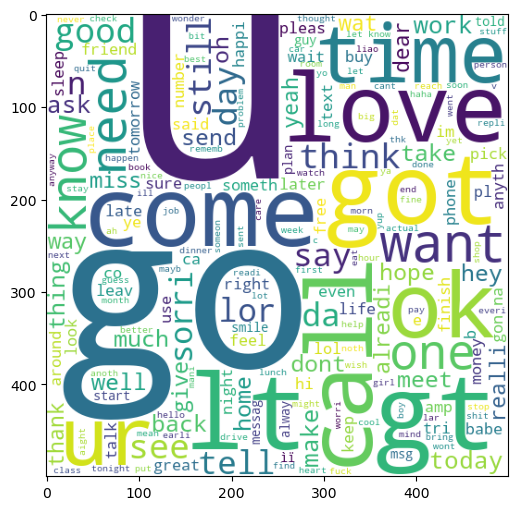

In [148]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [149]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [150]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [151]:
    len(spam_corpus)

9939

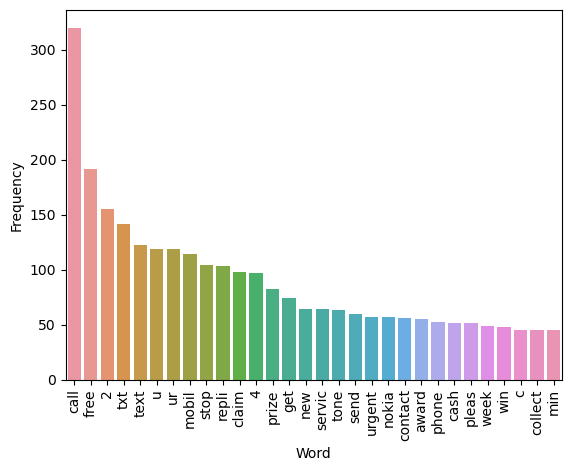

In [152]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list containing text data
# If not, replace spam_corpus with your actual variable
counter = Counter(spam_corpus)
common_words = pd.DataFrame(counter.most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()


In [153]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [154]:
len(ham_corpus)


35394

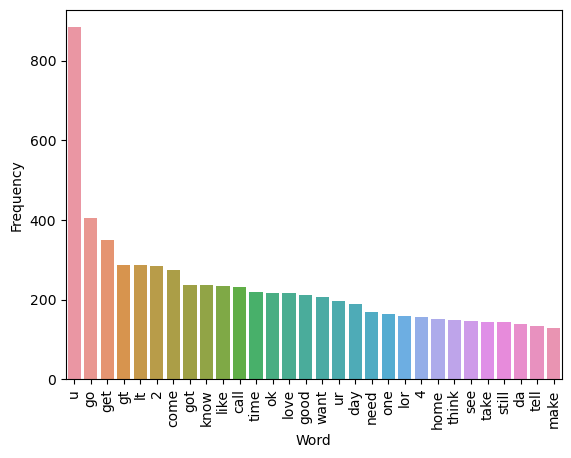

In [155]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list containing text data
# If not, replace ham_corpus with your actual variable
counter = Counter(ham_corpus)
common_words = pd.DataFrame(counter.most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()


In [156]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [157]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [158]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [159]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [160]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [161]:
X.shape


(5169, 3000)

In [162]:
y = df['target'].values

In [163]:
from sklearn.model_selection import train_test_split


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Assuming X_train, X_test, y_train, y_test are your training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)


In [165]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [166]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [168]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [169]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [170]:
# tfidf --> MNB


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [172]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [173]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [174]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [175]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [176]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8347826086956521
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9836065573770492
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8832116788321168
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.95
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.937984496124031


In [177]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [178]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.973888,0.983607
0,SVC,0.976789,0.954887
9,GBDT,0.946809,0.950000
10,xgb,0.969052,0.937984
7,BgC,0.961315,0.883212
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [179]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [180]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.909091
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.973888
4,SVC,Accuracy,0.976789
5,GBDT,Accuracy,0.946809
6,xgb,Accuracy,0.969052
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.946809
9,AdaBoost,Accuracy,0.950677


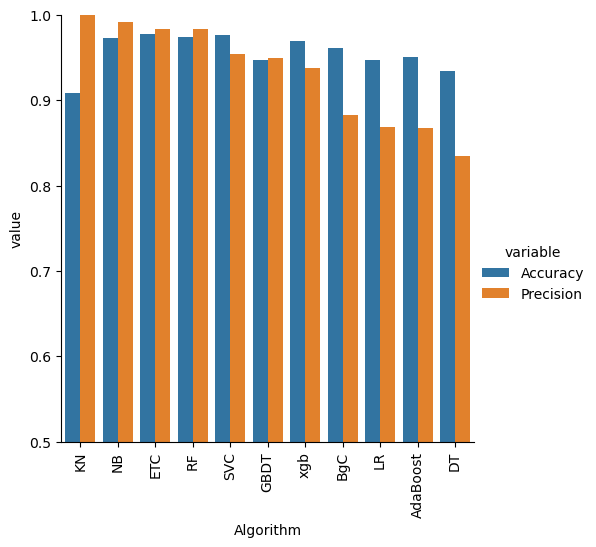

In [181]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [182]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [183]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [185]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [186]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [188]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000
1,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
2,ETC,0.977756,0.984127,0.977756,0.984127,0.977756,0.984127,0.977756,0.984127
3,RF,0.973888,0.983607,0.973888,0.983607,0.973888,0.983607,0.973888,0.983607
4,SVC,0.976789,0.954887,0.976789,0.954887,0.976789,0.954887,0.976789,0.954887
5,GBDT,0.946809,0.950000,0.946809,0.950000,0.946809,0.950000,0.946809,0.950000
6,xgb,0.969052,0.937984,0.969052,0.937984,0.969052,0.937984,0.969052,0.937984
7,BgC,0.961315,0.883212,0.961315,0.883212,0.961315,0.883212,0.961315,0.883212
8,LR,0.946809,0.868852,0.946809,0.868852,0.946809,0.868852,0.946809,0.868852
9,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188


In [189]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [190]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [191]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [192]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9921875


In [193]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [194]:
from sklearn.ensemble import StackingClassifier

In [195]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [196]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.9637681159420289


In [197]:
import pickle
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))